In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif" 
plt.rcParams["figure.figsize"] = (5,3)

SMALL_SIZE = 11
MEDIUM_SIZE = 11
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
import json
import numpy as np

In [3]:
all_seeds = [0, 10, 123, 231, 321]
SEED = all_seeds[0]
DATASET = 'Pubmed'

seed_influence_results = []
for SEED in all_seeds:
    with open('results/%s_weight_results_influence_seed%d.json'%(DATASET, SEED), 'r') as f:
        results = json.load(f)
        seed_influence_results.append(results)
        
seed_fisher_results = []
for SEED in all_seeds:
    with open('results/%s_weight_results_fisher_seed%d.json'%(DATASET, SEED), 'r') as f:
        results = json.load(f)
        seed_fisher_results.append(results)
        
seed_project_results = []
for SEED in all_seeds:
    with open('results/%s_weight_results_projection_seed%d.json'%(DATASET, SEED), 'r') as f:
        results = json.load(f)
        seed_project_results.append(results)

In [4]:
seed_influence_results  = np.array(seed_influence_results)
seed_project_results = np.array(seed_project_results)
seed_fisher_results = np.array(seed_fisher_results)

seed_influence_results = seed_influence_results[:, :, 0] / seed_influence_results[:, :, 3]
seed_project_results   = seed_project_results[:, :, 0]   / seed_project_results[:, :, 3]
seed_fisher_results    = seed_fisher_results[:, :, 0]    / seed_fisher_results[:, :, 3]

In [5]:
seed_influence_results.shape

(5, 181)

In [6]:
seed_influence_results_mean = np.mean(seed_influence_results, axis=0)
seed_influence_results_stds = np.std(seed_influence_results, axis=0)

seed_fisher_results_mean = np.mean(seed_fisher_results, axis=0)
seed_fisher_results_stds = np.std(seed_fisher_results, axis=0)

seed_project_results_mean = np.mean(seed_project_results, axis=0)
seed_project_results_stds = np.std(seed_project_results, axis=0)

In [7]:
num_delete_data = len(seed_influence_results_mean)

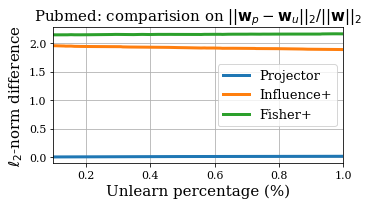

In [8]:
fig, axs = plt.subplots()

x_axis = (np.arange(num_delete_data) + 1) / num_delete_data
######################################

y_mean = seed_project_results_mean
y_std  = seed_project_results_stds
axs.plot(x_axis, y_mean, linewidth=3, linestyle='-', label='Projector')
axs.fill_between(x_axis, y_mean-y_std, y_mean+y_std, alpha=0.15)

######################################

y_mean = seed_influence_results_mean
y_std  = seed_influence_results_stds
axs.plot(x_axis, y_mean, linewidth=3, linestyle='-', label='Influence+')
axs.fill_between(x_axis, y_mean-y_std, y_mean+y_std, alpha=0.15)

######################################

y_mean = seed_fisher_results_mean
y_std  = seed_fisher_results_stds
axs.plot(x_axis, y_mean, linewidth=3, linestyle='-', label='Fisher+')
axs.fill_between(x_axis, y_mean-y_std, y_mean+y_std, alpha=0.15)

######################################
plt.title('%s: comparision on $||\mathbf{w}_p-\mathbf{w}_u||_2/||\mathbf{w}||_2$'%DATASET, fontsize=15)
axs.set_ylabel('$\ell_2$-norm difference', fontsize=15)
axs.set_xlabel('Unlearn percentage (%)', fontsize=15)
# axs.xaxis.get_major_locator().set_params(integer=True)
axs.grid(True)
fig.tight_layout()
axs.legend(fontsize=13)
plt.xlim(0.1, 1)

plt.savefig('%s_weight_diff.pdf'%DATASET, bbox_inches='tight')